# Hotel Reservations EDA
## Group 5
### Manuel García Plaza, José Miguel Ramírez Muñoz

We are in the hypothetical situation where a company interested in opening a hotel asks us to carry out a study in order to make decisions about the hotel's business plan: whether to focus on a family or adult public, whether it is profitable to offer certain services (parking, type of menu, different type of room), whether to invest in advertising at a certain time of the year, what prices would be competitive or whether to impose a bail bond foreseeing cancellations.


Data from:
https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [1]:
#ruta_csv = "C:\\Users\\ampar\\OneDrive\\Documentos\\GitHub\\trabajo_tema1\\hotel_reservations.csv"
data = readr::read_csv('hotel_reservations.csv')

Rows: 36275 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_...
dbl (14): no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nig...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [2]:
install.packages('ggplot2')

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)



The file contains the different attributes of customers' reservation details. Here is a little description of the variables:
### Data dictionary:

• **Booking_ID:** unique identifier of each booking

• **no_of_adults:** Number of adults

• **no_of_children:** Number of Children

• **no_of_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

• **no_of_week_nights:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

• **type_of_meal_plan:** Type of meal plan booked by the customer: 1 is breakfast, 2 is half board, 3 is full board

• **required_car_parking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)

• **room_type_reserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

• **lead_time:** Number of days between the date of booking and the arrival date

• **arrival_year:** Year of arrival date

• **arrival_month:** Month of arrival date

• **arrival_date:** Date of the month

• **market_segment_type:** Market segment designation:

Aviation -  the person is in the Aviation Industry e.g. pilot, air hostess and has made a reservation through their forum
Complementary - Complementary stay
Offline - Booking done in person
Online - Booking done online
Corporate - Booking done through Corporate office provided forum/platform

• **repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)

• **no_of_previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking

• **no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking

• **avg_price_per_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

• **no_of_special_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

• **booking_status:** Flag indicating if the booking was canceled or not.

In [2]:
head(data)

Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled


In [5]:
cat('The dataset contains', nrow(data), 'bookings and', ncol(data)-1, "variables (we don't count the ID as a variable).")

The dataset contains 36275 bookings and 18 variables (we don't count the ID as a variable).

In [6]:
sapply(data, class)

Booking_ID                         no_of_adults 
                         "character"                            "numeric" 
                      no_of_children                 no_of_weekend_nights 
                           "numeric"                            "numeric" 
                   no_of_week_nights                    type_of_meal_plan 
                           "numeric"                          "character" 
          required_car_parking_space                   room_type_reserved 
                           "numeric"                          "character" 
                           lead_time                         arrival_year 
                           "numeric"                            "numeric" 
                       arrival_month                         arrival_date 
                           "numeric"                            "numeric" 
                 market_segment_type                       repeated_guest 
                         "character"                            "numeric" 
        no_of_previous_cancellations no_of_previous_bookings_not_canceled 
                           "numeric"                            "numeric" 
                  avg_price_per_room               no_of_special_requests 
                           "numeric"                            "numeric" 
                      booking_status 
                         "character"

In [7]:
cat('Categorizing variables, we have', sum(sapply(data, class) == 'numeric')-2, 'numerical variables and', sum(sapply(data, class) == 'character')+1, 'categorical ones.')

Categorizing variables, we have 12 numerical variables and 6 categorical ones.

In [8]:
sum(is.na(data) == TRUE)

[1] 0

So we don't have missing or NaN values.

And now, a brief review overall:

In [9]:
summary(data)

  Booking_ID         no_of_adults   no_of_children    no_of_weekend_nights
 Length:36275       Min.   :0.000   Min.   : 0.0000   Min.   :0.0000      
 Class :character   1st Qu.:2.000   1st Qu.: 0.0000   1st Qu.:0.0000      
 Mode  :character   Median :2.000   Median : 0.0000   Median :1.0000      
                    Mean   :1.845   Mean   : 0.1053   Mean   :0.8107      
                    3rd Qu.:2.000   3rd Qu.: 0.0000   3rd Qu.:2.0000      
                    Max.   :4.000   Max.   :10.0000   Max.   :7.0000      
 no_of_week_nights type_of_meal_plan  required_car_parking_space
 Min.   : 0.000    Length:36275       Min.   :0.00000           
 1st Qu.: 1.000    Class :character   1st Qu.:0.00000           
 Median : 2.000    Mode  :character   Median :0.00000           
 Mean   : 2.204                       Mean   :0.03099           
 3rd Qu.: 3.000                       3rd Qu.:0.00000           
 Max.   :17.000                       Max.   :1.00000           
 room_type_reserved 

Let's see which are the values of these categorical variables; considering also both boolean variables as in de data dictionary is specified:

In [10]:
cat('Type of meal plans:')
unique(data$type_of_meal_plan)
cat('Type of rooms:')
unique(data$room_type_reserved)
cat('Type of market segment:')
unique(data$market_segment_type)
cat('Booking status:')
unique(data$booking_status)

Type of meal plans:

[1] "Meal Plan 1"  "Not Selected" "Meal Plan 2"  "Meal Plan 3"

Type of rooms:

[1] "Room_Type 1" "Room_Type 4" "Room_Type 2" "Room_Type 6" "Room_Type 5"
[6] "Room_Type 7" "Room_Type 3"

Type of market segment:

[1] "Offline"       "Online"        "Corporate"     "Aviation"     
[5] "Complementary"

Booking status:

[1] "Not_Canceled" "Canceled"

Agroupations for future plots:

In [11]:
sec1 = which(data$avg_price_per_room <=81)
sec2 = which(data$avg_price_per_room > 81 & data$avg_price_per_room < 105.2)
sec3 = which(data$avg_price_per_room >= 105.2)

sector <- rep('NA',36275)
estaciones <- rep('NA', nrow(data))
semana <- rep('NA', nrow(data))

sector[data$avg_price_per_room <=81] = 'Sector 1'
sector[data$avg_price_per_room > 81 & data$avg_price_per_room < 121] = 'Sector 2'
sector[data$avg_price_per_room >= 121] = 'Sector 3'

estaciones[data$arrival_month >= 3 & data$arrival_month <= 8] = 'primavera-verano'
estaciones[data$arrival_month > 8 | data$arrival_month < 3] = 'otoño-invierno'

semana[data$no_of_weekend_nights == 0 & data$no_of_week_nights > 0] = 'Solo entre semana'
semana[data$no_of_weekend_nights > 0 & data$no_of_week_nights == 0] = 'Solo fin de semana' 
semana[data$no_of_weekend_nights > 0 & data$no_of_week_nights > 0] = 'Ambos'
semana[data$no_of_weekend_nights == 0 & data$no_of_week_nights == 0] = 'Sin noches'

newdata <- cbind(data,sector,estaciones,semana)


newdata$arrival_year[newdata$arrival_year == 2017] = '2017'
newdata$arrival_year[newdata$arrival_year == 2018] = '2018'
newdata$arrival_year <- as.factor(newdata$arrival_year)
class(newdata$arrival_year)
unique(newdata$arrival_year)

[1] "factor"

[1] 2017 2018
Levels: 2017 2018

In [12]:
sapply(newdata, class)

Booking_ID                         no_of_adults 
                         "character"                            "numeric" 
                      no_of_children                 no_of_weekend_nights 
                           "numeric"                            "numeric" 
                   no_of_week_nights                    type_of_meal_plan 
                           "numeric"                          "character" 
          required_car_parking_space                   room_type_reserved 
                           "numeric"                          "character" 
                           lead_time                         arrival_year 
                           "numeric"                             "factor" 
                       arrival_month                         arrival_date 
                           "numeric"                            "numeric" 
                 market_segment_type                       repeated_guest 
                         "character"                            "numeric" 
        no_of_previous_cancellations no_of_previous_bookings_not_canceled 
                           "numeric"                            "numeric" 
                  avg_price_per_room               no_of_special_requests 
                           "numeric"                            "numeric" 
                      booking_status                               sector 
                         "character"                          "character" 
                          estaciones                               semana 
                         "character"                          "character"

Let's compute all the correlations for observing a possible (linear) relation between some pairs of numerical columns.

In [13]:
cor = cor(data[c(2:5,7,9, 14:18)])
round(cor, 3)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000,-0.020,0.103,0.106,0.011,0.097,-0.192,-0.047,-0.119,0.297,0.189
no_of_children,-0.020,1.000,0.029,0.024,0.034,-0.047,-0.036,-0.016,-0.021,0.338,0.124
no_of_weekend_nights,0.103,0.029,1.000,0.180,-0.031,0.047,-0.067,-0.021,-0.026,-0.005,0.061
no_of_week_nights,0.106,0.024,0.180,1.000,-0.049,0.150,-0.100,-0.030,-0.049,0.023,0.046
required_car_parking_space,0.011,0.034,-0.031,-0.049,1.000,-0.066,0.111,0.027,0.064,0.061,0.088
lead_time,0.097,-0.047,0.047,0.150,-0.066,1.000,-0.136,-0.046,-0.078,-0.063,-0.102
repeated_guest,-0.192,-0.036,-0.067,-0.100,0.111,-0.136,1.000,0.391,0.539,-0.175,-0.012
no_of_previous_cancellations,-0.047,-0.016,-0.021,-0.030,0.027,-0.046,0.391,1.000,0.468,-0.063,-0.003
no_of_previous_bookings_not_canceled,-0.119,-0.021,-0.026,-0.049,0.064,-0.078,0.539,0.468,1.000,-0.114,0.027
avg_price_per_room,0.297,0.338,-0.005,0.023,0.061,-0.063,-0.175,-0.063,-0.114,1.000,0.184


In [14]:
length(cor[abs(cor)>0.7])

[1] 11

In [15]:
length(cor[0.7>abs(cor) & abs(cor)>0.4])

[1] 4

There are only 11 values with correlation greater than 0.7 (in absolute value) but they are from the diagonal, so we do not have any (linear) correlation between these columns. Nevertheless we can observe two variables that they have correlation between 0.4 and 0.7.

Now, we start searching any relationship or pattern visualizing the data. First of all with the distribution of the average price per room:

# Prices

In [16]:
library(ggplot2)
g = data$avg_price_per_room
m = mean(g)
std = sqrt(var(g))

dis <- dnorm(c(80.3, 120), m, std)
print(dis)

[1] 0.009150274 0.010168891


Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


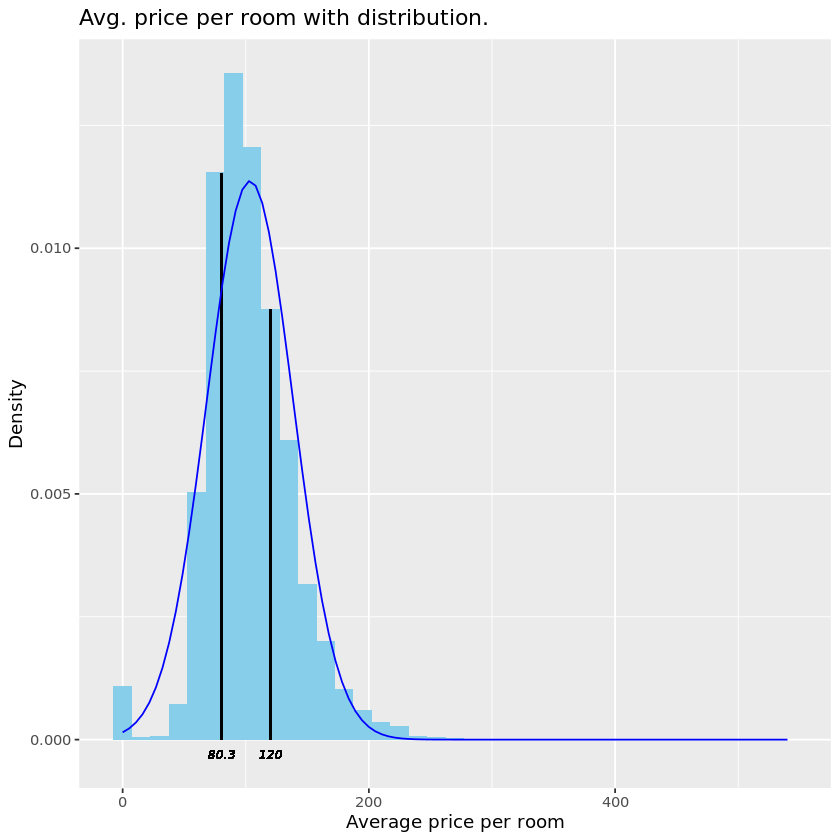

In [17]:
ggplot(data, aes(g))+
    geom_histogram(aes(y = ..density..), binwidth=15, alpha=1, fill='sky blue') +
    geom_segment(aes(x = 80.3, y = 0, xend = 80.3, yend = 0.01153), color = 'black') +
    # geom_label(aes(label='80.3', y= 0), size=3) +
    geom_text(aes(label='80.3',x = 80.2, y=-0.0003), size=2.5, fontface="italic") +
    geom_text(aes(label='120',x = 120, y=-0.0003), size=2.5, fontface="italic") +
    geom_segment(aes(x = 120, y = 0, xend = 120, yend = 0.00875)) +
    stat_function(fun = dnorm, args = list(mean = m, sd = std), col='blue') +
    labs(x ='Average price per room', y='Density', title = 'Avg. price per room with distribution.')
    


In [18]:
###
###hist(g, density=20, breaks=20, prob=TRUE, 
#     xlab="x-variable", 
#     main="normal curve over histogram")
#curve(dnorm(x, mean=m, sd=std), 
#     col="darkblue", lwd=2, add=TRUE, yaxt="n")


In [19]:
cat('Looks like a normal distribution with mean', m, 'and standard deviation', std, 'as the histogram fits quite well to the normal density curve.')

Looks like a normal distribution with mean 103.4235 and standard deviation 35.08942 as the histogram fits quite well to the normal density curve.

In [4]:
#boxplot(data$avg_price_per_room)

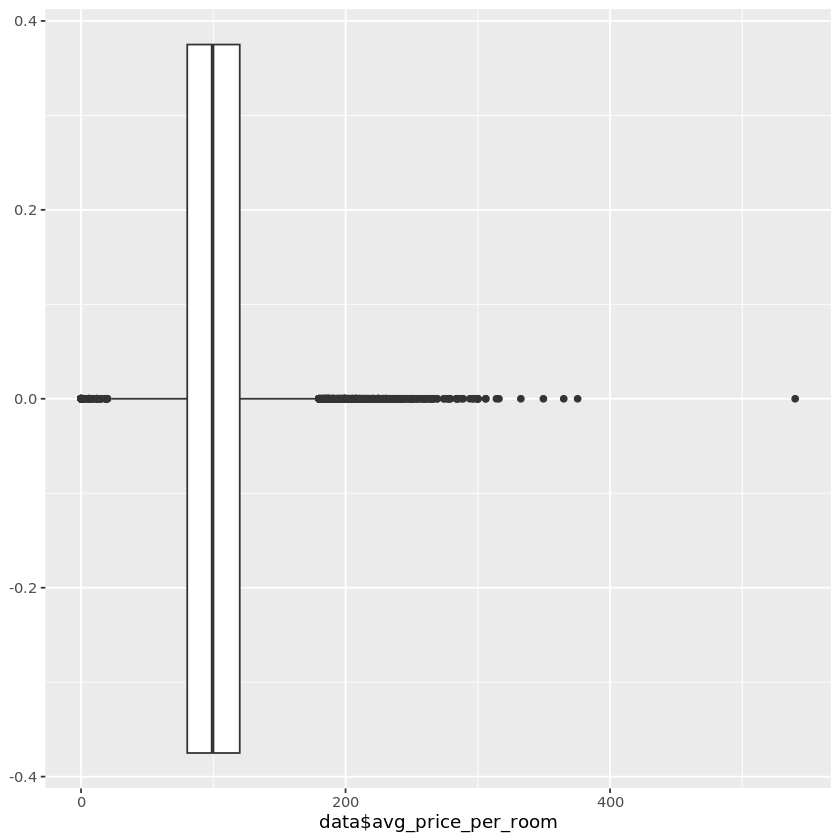

In [21]:

ggplot(data, aes(data$avg_price_per_room)) + geom_boxplot()

All the customers out of the central sample could be outliers, especially the highest one. And all the zeros don't make sense at all.

[1] 598

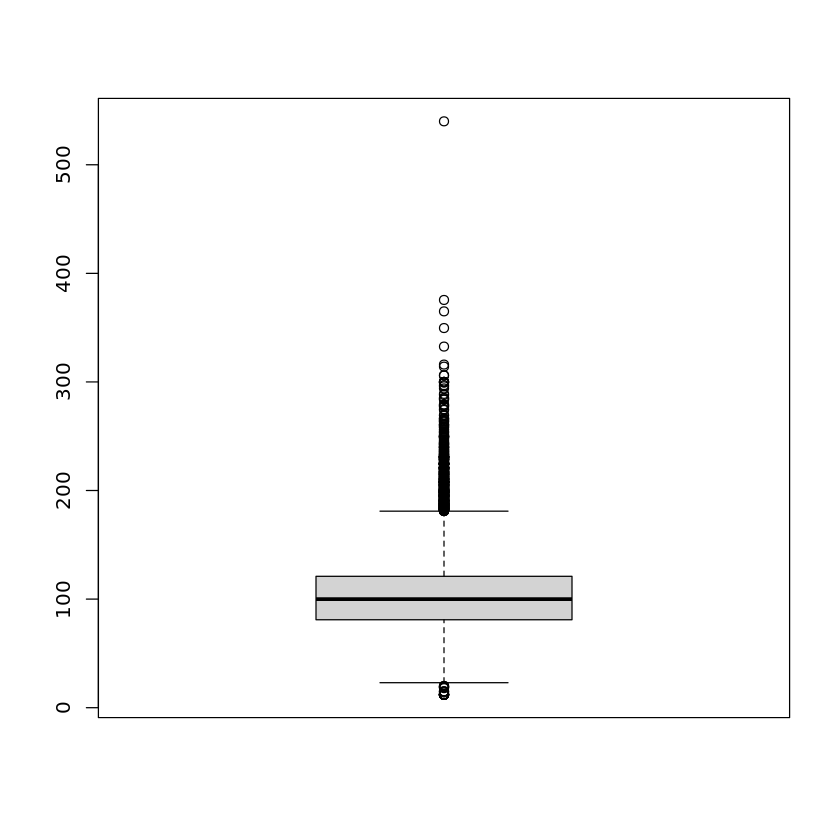

In [22]:
#without small values for the price

price0 = which(data$avg_price_per_room < 10)
length(price0)
boxplot(data$avg_price_per_room[-price0])

We keep having these values, but seems like they're out because the number of observations is too high.

In [23]:
price0_2017 = which(data$avg_price_per_room >= 10 & data$arrival_year == 2017)
mean(data[price0_2017,]$avg_price_per_room)

[1] 93.50712

In [24]:
summary(data$avg_price_per_room)
summary(data$avg_price_per_room[-price0])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   80.30   99.45  103.42  120.00  540.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   12.0    81.0   100.0   105.2   121.0   540.0 

Eliminating all the zero values we have a very similar distribution on average prices per room.

In [25]:
install.packages('gridExtra')

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)



## Price per date

ERROR: Error in ggplot(data[arrival2017, ], aes(data$avg_price_per_room[arrival2017])): could not find function "ggplot"


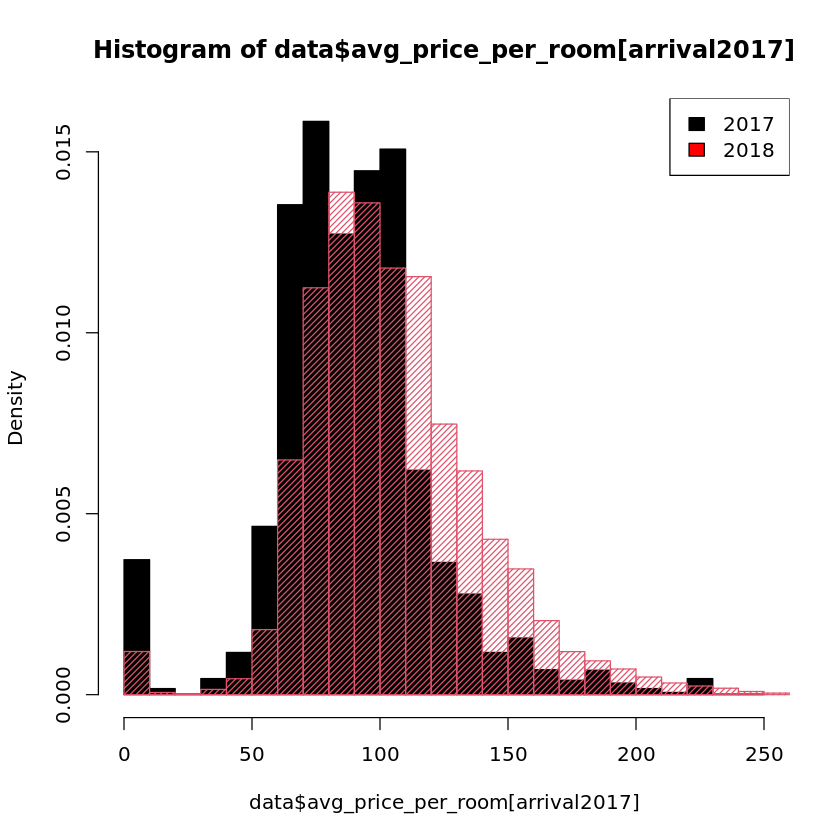

In [5]:
arrival2017 = which(data$arrival_year == 2017)
hist(data$avg_price_per_room[arrival2017], probability=TRUE, breaks=20, col='black')
hist(data$avg_price_per_room[-arrival2017], probability=T, breaks=40, add=T, col=2, density=30)
legend('topright', c('2017', '2018'), fill=c('black', 'red'))

g1 <- ggplot(data[arrival2017,], aes(data$avg_price_per_room[arrival2017])) +
    geom_histogram(binwidth = 10, alpha = 0.5, fill = "orange",
                 aes(y = (..count..)/sum(..count..)), position='identity') +
    labs(x ='Average price per room', y='Count', title = '2017') +
    ylim(0, 0.17) + xlim(0, 300)

g2 <- ggplot(data[-arrival2017,], aes(data$avg_price_per_room[-arrival2017])) +
    geom_histogram(binwidth = 10, alpha = 0.5, fill = "blue",
                 aes(y = (..count..)/sum(..count..)), position='identity')+
    labs(x ='Average price per room', y='Count', title = '2018') +
    ylim(0, 0.17) + xlim(0, 300)


library(gridExtra)
grid.arrange(g1, g2, nrow=1)

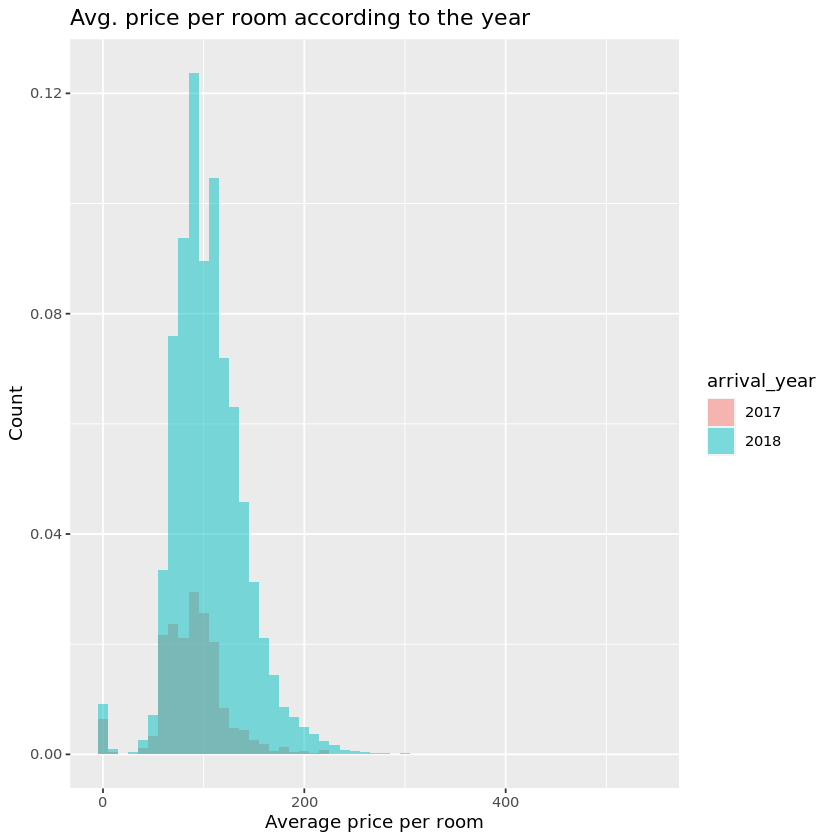

In [27]:
newdata$arrival_year <- as.factor(newdata$arrival_year)

gyear <- ggplot(newdata, aes(avg_price_per_room, fill = arrival_year)) +
    geom_histogram(binwidth = 10, alpha = 0.5,
                  aes(y = (..count..)/sum(..count..)), position='identity') +
    labs(x ='Average price per room', y='Count', title = 'Avg. price per room according to the year') 

plot(gyear)

In [28]:
length(arrival2017)
nrow(data) - length(arrival2017)
mean(data$avg_price_per_room[arrival2017])
mean(data$avg_price_per_room[-arrival2017])
length(arrival2017)/nrow(data)
(nrow(data)-length(arrival2017))/nrow(data)

[1] 6514

[1] 29761

[1] 90.0279

[1] 106.3555

[1] 0.1795727

[1] 0.8204273

It seems that there are no big differences between the shape of the distribution of prices on 2017 and 2018 (years we have data of) but in 2018 prices in mean have increased a bit.

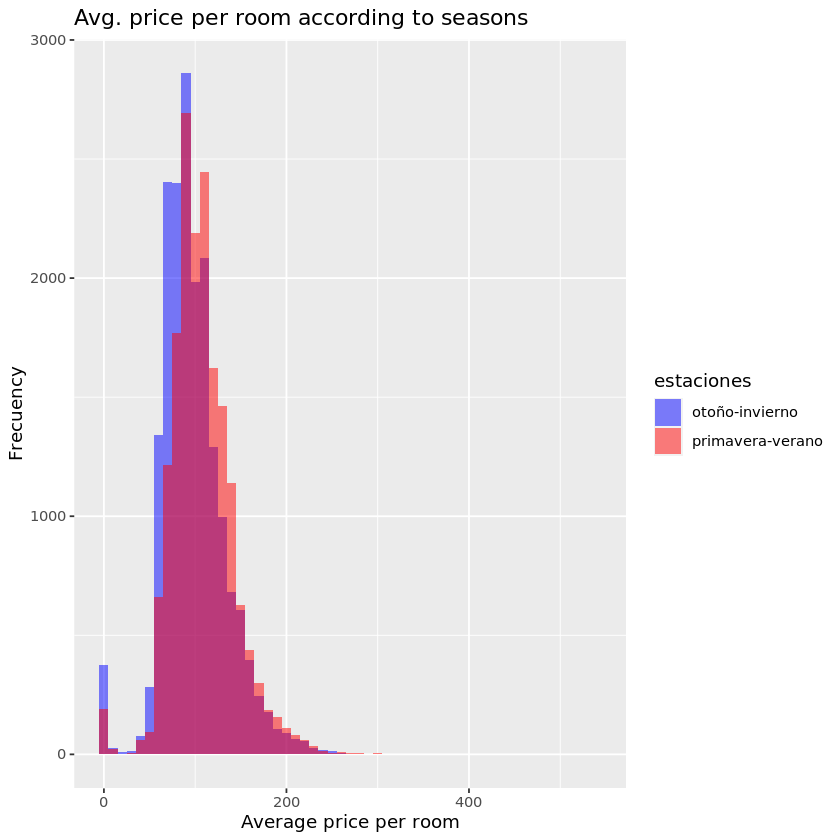

In [29]:
gestaciones <- ggplot(newdata, aes(avg_price_per_room, fill = estaciones)) +
    geom_histogram(binwidth = 10, width = 0.5, alpha = 0.5,
                 aes(y = (..count..)), position='identity') +
    labs(x='Average price per room', y='Frecuency', title = 'Avg. price per room according to seasons') +
    scale_fill_manual(values = c("blue", "red"))

plot(gestaciones)

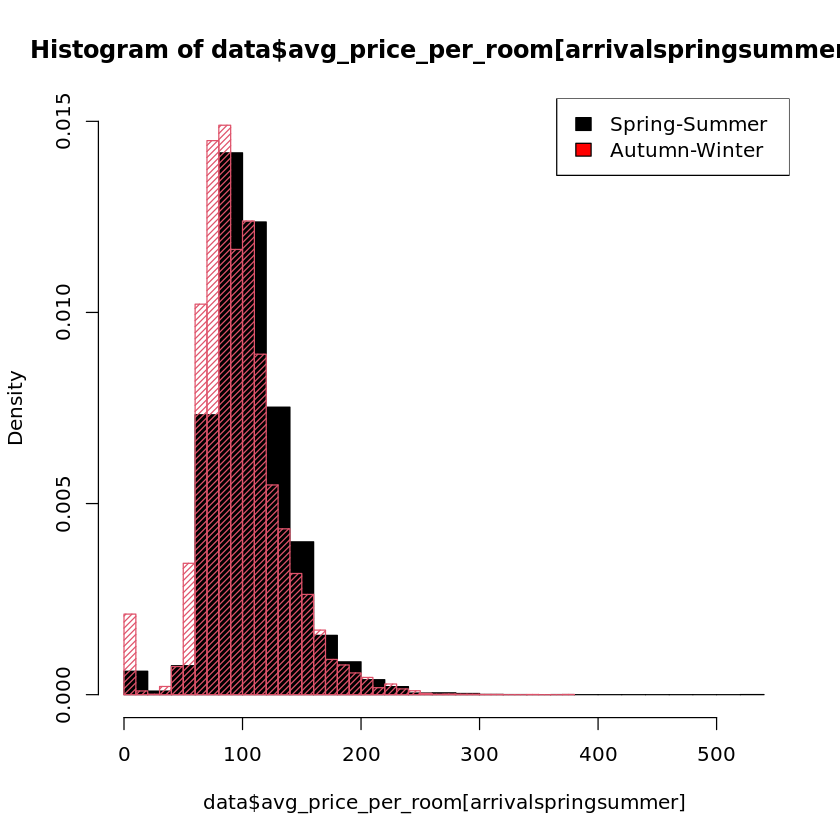

In [30]:
arrivalspringsummer = which(data$arrival_month >= 3 & data$arrival_month <= 8)
hist(data$avg_price_per_room[arrivalspringsummer], probability=TRUE, breaks=20, col='black', ylim=c(0,0.015))
hist(data$avg_price_per_room[-arrivalspringsummer], probability=T, breaks=40, add=T, col=2, density=30, ylim=c(0,0.015))
legend('topright', c('Spring-Summer', 'Autumn-Winter'), fill=c('black', 'red'))

In [31]:
mean(data$avg_price_per_room[arrivalspringsummer])
mean(data$avg_price_per_room[-arrivalspringsummer])
price0_autumnwinter = which(data$avg_price_per_room >= 10 & (data$arrival_month >= 9 | data$arrival_month <= 2))
mean(data$avg_price_per_room[price0_autumnwinter])

[1] 108.22

[1] 98.88919

[1] 101.0098

In [32]:
# arrivalspringsummer = which(data$arrival_month >= 3 & data$arrival_month <= 8)

#gsummer <- ggplot(data[arrivalspringsummer,], aes(data$avg_price_per_room[arrivalspringsummer])


#graphsummer <- ggplot(data[arrivalspringsummer,], 
#                aes(x = data$avg_price_per_room, fill = arrivalspringsummer) +
#            geom_histogram(binwidth = 10, alpha = 0.5, fill = "orange",
#                 aes(y = (..count..)), position='identity') +
#            labs(x ='Average price per room', y='Count', title = 'Arrivals\' graph in Sripng-Summer') 


#graphwinter <- ggplot(data[-arrivalspringsummer,], aes(data$avg_price_per_room[-arrivalspringsummer])) +
#            geom_histogram(binwidth = 10, alpha = 0.5, fill = "blue",
#                 aes(y = (..count..)), position='identity') +
#            labs(x ='Average price per room', y='Count', title = 'Arrivals\' graph in Autumn-Winter')

#library(gridExtra)
#plot(graphsummer)

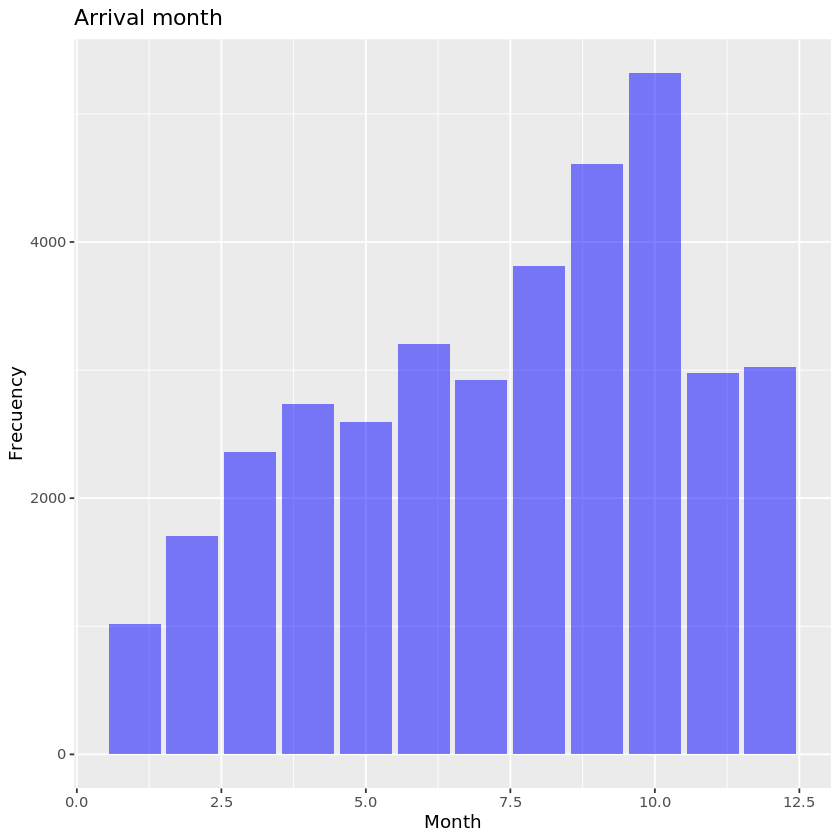

In [33]:
# hist(data$arrival_month)

gmonth <- ggplot(data, aes(data$arrival_month)) +
    geom_bar(alpha = 0.5, fill = "blue",
                 aes(y = (..count..)), position='stack') +
    labs(x ='Month', y='Frecuency', title = 'Arrival month') 

library(gridExtra)
plot(gmonth)

The shape of the histograms is very similar (they both are distributed normally) but in Spring-Summer the mean is a bit greater. Also note that people is uniformly-distributed in the groups Spring-Summer and Autumn-Winter:

In [34]:
cat(length(arrivalspringsummer)/nrow(data)*100, '% of the bookings are between March and August.')

48.59545 % of the bookings are between March and August.

Now we are comparing average prices according to the room type type. We have room types 1,...,7.

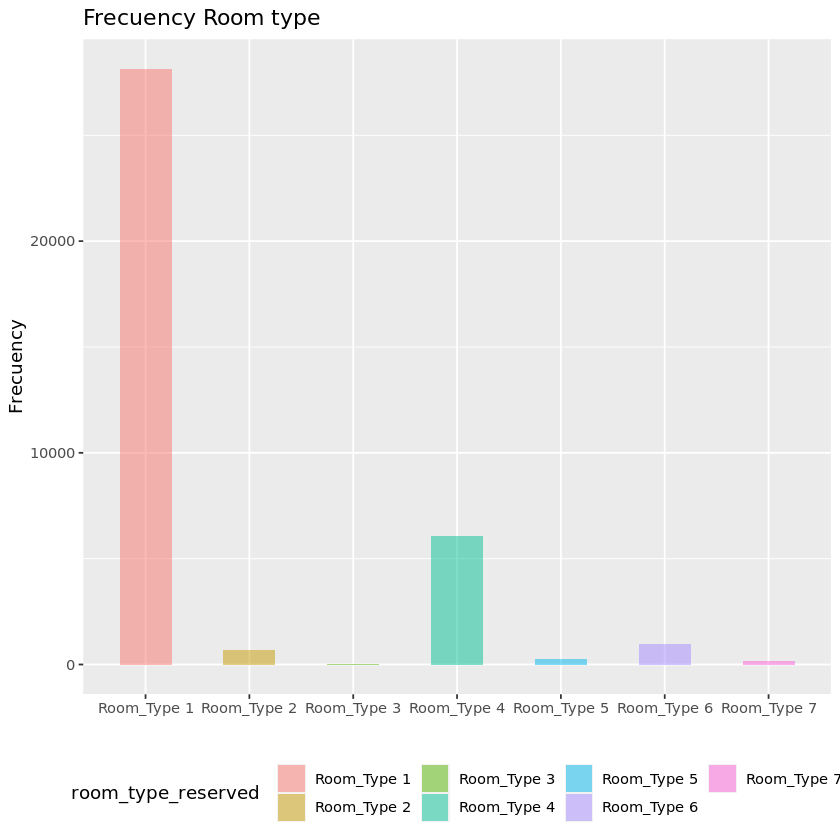

In [35]:
# barplot(table(data$room_type_reserved))

groomtype <- ggplot(data, aes(data$room_type_reserved, fill = room_type_reserved)) +
    geom_bar(width = 0.5, alpha = 0.5,
                 aes(y = (..count..)), position='stack') +
    labs(x='', y='Frecuency', title = 'Frecuency Room type') +
    theme(legend.position = "bottom")

library(gridExtra)
plot(groomtype)

## Price per room type

### All rows

In [36]:
roomtype1 = which(data$room_type_reserved == 'Room_Type 1')
roomtype2 = which(data$room_type_reserved == 'Room_Type 2')
roomtype3 = which(data$room_type_reserved == 'Room_Type 3')
roomtype4 = which(data$room_type_reserved == 'Room_Type 4')
roomtype5 = which(data$room_type_reserved == 'Room_Type 5')
roomtype6 = which(data$room_type_reserved == 'Room_Type 6')
roomtype7 = which(data$room_type_reserved == 'Room_Type 7')

In [37]:
length(roomtype1)
length(roomtype2)
length(roomtype3)
length(roomtype4)
length(roomtype5)
length(roomtype6)
length(roomtype7)

[1] 28130

[1] 692

[1] 7

[1] 6057

[1] 265

[1] 966

[1] 158

We don't plot room type 3 because there are only 7 reservations of this type, and it doesn't apport any relevant information.

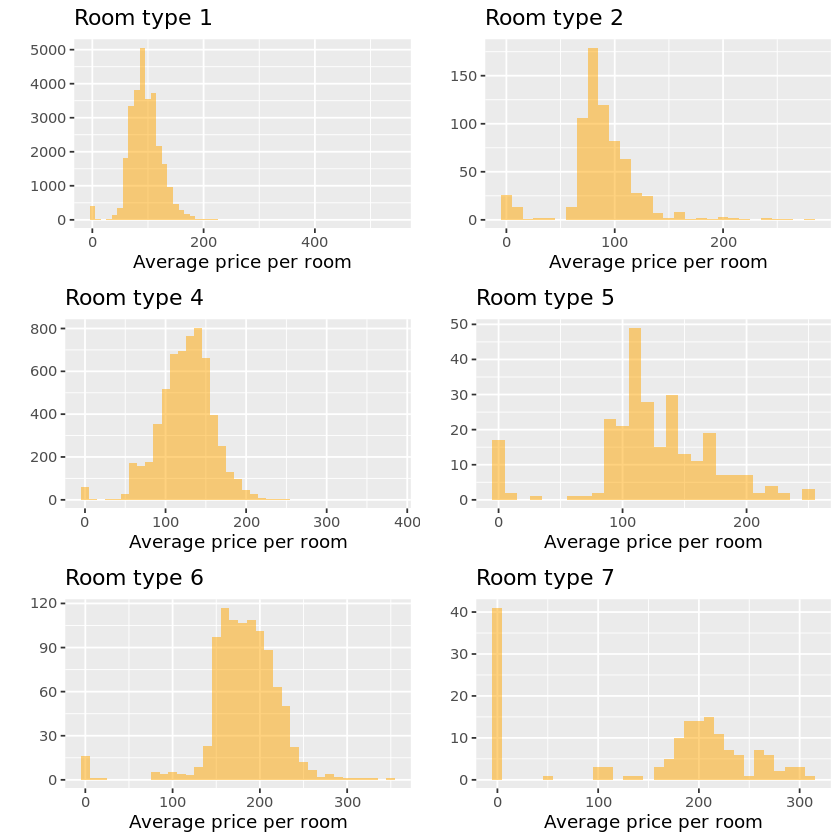

In [38]:
groom1 <- ggplot(data[roomtype1,], aes(data$avg_price_per_room[roomtype1])) +
    geom_histogram(binwidth = 10, alpha = 0.5, fill = "orange",
                 aes(y = (..count..)), position='identity') +
    labs(x ='Average price per room', title = 'Room type 1', y='')

groom2 <- ggplot(data[roomtype2,], aes(data$avg_price_per_room[roomtype2])) +
    geom_histogram(binwidth = 10, alpha = 0.5, fill = "orange",
                 aes(y = (..count..)), position='identity') +
    labs(x ='Average price per room', title = 'Room type 2', y='')

groom4 <- ggplot(data[roomtype4,], aes(data$avg_price_per_room[roomtype4])) +
    geom_histogram(binwidth = 10, alpha = 0.5, fill = "orange",
                 aes(y = (..count..)), position='identity') +
    labs(x ='Average price per room', title = 'Room type 4', y='')

groom5 <- ggplot(data[roomtype5,], aes(data$avg_price_per_room[roomtype5])) +
    geom_histogram(binwidth = 10, alpha = 0.5, fill = "orange",
                 aes(y = (..count..)), position='identity') +
    labs(x ='Average price per room', title = 'Room type 5', y='')

groom6 <- ggplot(data[roomtype6,], aes(data$avg_price_per_room[roomtype6])) +
    geom_histogram(binwidth = 10, alpha = 0.5, fill = "orange",
                 aes(y = (..count..)), position='identity') +
    labs(x ='Average price per room', title = 'Room type 6', y='')

groom7 <- ggplot(data[roomtype7,], aes(data$avg_price_per_room[roomtype7])) +
    geom_histogram(binwidth = 10, alpha = 0.5, fill = "orange",
                 aes(y = (..count..)), position='identity') +
    labs(x ='Average price per room', title = 'Room type 7', y='')


library(gridExtra)
grid.arrange(groom1, groom2, groom4, groom5, groom6, groom7, nrow=3)

We can see that there are a lot of 0 values on average prices which doesn't make sense at all. It could be missing values.

In [39]:
# medias con valores 0

meanr1 = mean(data$avg_price_per_room[roomtype1])
meanr2 = mean(data$avg_price_per_room[roomtype2])
meanr4 = mean(data$avg_price_per_room[roomtype4])
meanr5 = mean(data$avg_price_per_room[roomtype5])
meanr6 = mean(data$avg_price_per_room[roomtype6])
meanr7 = mean(data$avg_price_per_room[roomtype7])

In [40]:
cat('Mean of the average price per room of room type 1:', meanr1)
cat('\nMean of the average price per room of room type 2:', meanr2)
cat('\nMean of the average price per room of room type 4:', meanr4)
cat('\nMean of the average price per room of room type 5:', meanr5)
cat('\nMean of the average price per room of room type 6:', meanr6)
cat('\nMean of the average price per room of room type 7:', meanr7)

Mean of the average price per room of room type 1: 95.91853
Mean of the average price per room of room type 2: 87.84855
Mean of the average price per room of room type 4: 125.2873
Mean of the average price per room of room type 5: 123.7336
Mean of the average price per room of room type 6: 182.2128
Mean of the average price per room of room type 7: 155.1983

### Without 0-values

In [41]:
roomtype1_0 = which(data$avg_price_per_room > 10 & data$room_type_reserved == 'Room_Type 1')
roomtype2_0 = which(data$avg_price_per_room > 10 & data$room_type_reserved == 'Room_Type 2')
roomtype3_0 = which(data$avg_price_per_room > 10 & data$room_type_reserved == 'Room_Type 3')
roomtype4_0 = which(data$avg_price_per_room > 10 & data$room_type_reserved == 'Room_Type 4')
roomtype5_0 = which(data$avg_price_per_room > 10 & data$room_type_reserved == 'Room_Type 5')
roomtype6_0 = which(data$avg_price_per_room > 10 & data$room_type_reserved == 'Room_Type 6')
roomtype7_0 = which(data$avg_price_per_room > 10 & data$room_type_reserved == 'Room_Type 7')


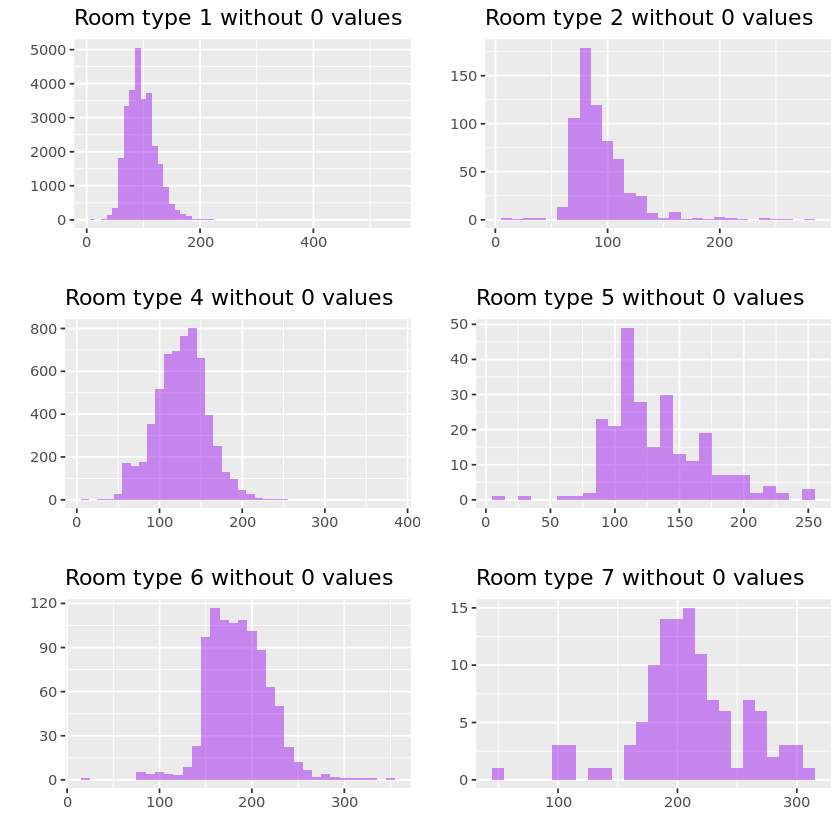

In [42]:
groom1_0 <- ggplot(data[roomtype1_0,], aes(data$avg_price_per_room[roomtype1_0])) +
    geom_histogram(binwidth = 10, alpha = 0.5, fill = "purple",
                 aes(y = (..count..)), position='identity') +
    labs(x ='', y='', title = 'Room type 1 without 0 values')

groom2_0 <- ggplot(data[roomtype2_0,], aes(data$avg_price_per_room[roomtype2_0])) +
    geom_histogram(binwidth = 10, alpha = 0.5, fill = "purple",
                 aes(y = (..count..)), position='identity') +
    labs(x ='', y='', title = 'Room type 2 without 0 values')

groom4_0 <- ggplot(data[roomtype4_0,], aes(data$avg_price_per_room[roomtype4_0])) +
    geom_histogram(binwidth = 10, alpha = 0.5, fill = "purple",
                 aes(y = (..count..)), position='identity') +
    labs(x ='', y='', title = 'Room type 4 without 0 values')

groom5_0 <- ggplot(data[roomtype5_0,], aes(data$avg_price_per_room[roomtype5_0])) +
    geom_histogram(binwidth = 10, alpha = 0.5, fill = "purple",
                 aes(y = (..count..)), position='identity') +
    labs(x ='', y='', title = 'Room type 5 without 0 values')

groom6_0 <- ggplot(data[roomtype6_0,], aes(data$avg_price_per_room[roomtype6_0])) +
    geom_histogram(binwidth = 10, alpha = 0.5, fill = "purple",
                 aes(y = (..count..)), position='identity') +
    labs(x ='',  y='',title = 'Room type 6 without 0 values')

groom7_0 <- ggplot(data[roomtype7_0,], aes(data$avg_price_per_room[roomtype7_0])) +
    geom_histogram(binwidth = 10, alpha = 0.5, fill = "purple",
                 aes(y = (..count..)), position='identity') +
    labs(x ='',  y='',title = 'Room type 7 without 0 values')


library(gridExtra)
grid.arrange(groom1_0, groom2_0, groom4_0, groom5_0, groom6_0, groom7_0, nrow=3)

In [43]:
meanr1_0 = mean(data$avg_price_per_room[which(data$avg_price_per_room > 10 & data$room_type_reserved == 'Room_Type 1')])
meanr2_0 = mean(data$avg_price_per_room[which(data$avg_price_per_room > 10 & data$room_type_reserved == 'Room_Type 2')])
meanr4_0 = mean(data$avg_price_per_room[which(data$avg_price_per_room > 10 & data$room_type_reserved == 'Room_Type 4')])
meanr5_0 = mean(data$avg_price_per_room[which(data$avg_price_per_room > 10 & data$room_type_reserved == 'Room_Type 5')])
meanr6_0 = mean(data$avg_price_per_room[which(data$avg_price_per_room > 10 & data$room_type_reserved == 'Room_Type 6')])
meanr7_0 = mean(data$avg_price_per_room[which(data$avg_price_per_room > 10 & data$room_type_reserved == 'Room_Type 7')])


In [44]:
 #DIFERENCIAS DE MEDIAS CON Y SIN CEROS (SIN CEROS - CON CEROS)

medias = c(meanr1, meanr2, meanr4, meanr5, meanr6, meanr7)
mediassincero = c(meanr1_0, meanr2_0, meanr4_0, meanr5_0, meanr6_0, meanr7_0)
difmedias = mediassincero - medias
porcent = round(100*difmedias/medias,2)
Room_types = c('1', '2', '4', '5', '6', '7')
df_medias_roomtype = data.frame(Room_types, medias, mediassincero, difmedias,porcent)
colnames(df_medias_roomtype) = c('Room type','Mean','Mean without low values','Difference','Difference percentage')
df_medias_roomtype


Room type,Mean,Mean without low values,Difference,Difference percentage
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,95.91853,97.37469,1.456154,1.52
2,87.84855,92.70218,4.853628,5.52
4,125.28732,126.55817,1.270855,1.01
5,123.73362,132.72636,8.992734,7.27
6,182.21284,185.47060,3.257764,1.79
7,155.19829,209.57547,54.377179,35.04


Now we can confirm that these values are relevant (could be errrors in the data collection): room type 7 suffers a huge difference; the rest of the types are not so affected.

## About week

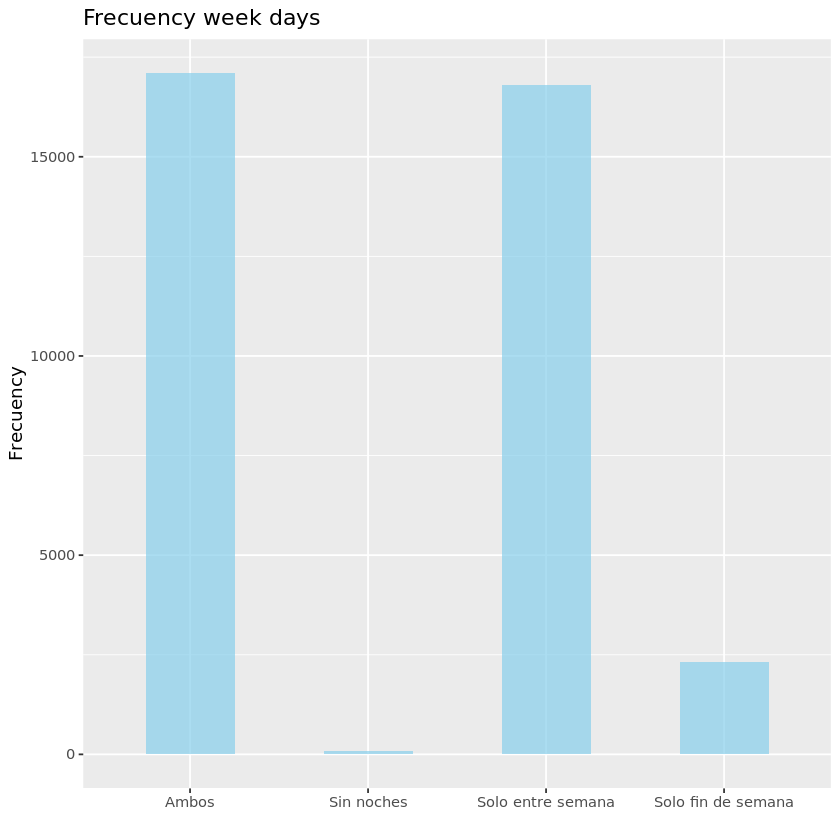

In [68]:
gsemana <- ggplot(newdata, aes(semana)) +
    geom_bar(width = 0.5, alpha = 0.7,
                 aes(y = (..count..)), position='stack', fill='sky blue') +
    labs(x='', y='Frecuency', title = 'Frecuency week days')

plot(gsemana)

In [69]:
mean(data$avg_price_per_room[which(newdata$semana == 'Ambos')])
mean(data$avg_price_per_room[which(newdata$semana == 'Solo entre semana')])
mean(data$avg_price_per_room[which(newdata$semana == 'Solo fin de semana')])


[1] 103.6726

[1] 103.9027

[1] 101.5885

There is practically no difference in the means of these groups so it does not seem relevant to make this separation.

## About meal type

In [71]:
mean(data$avg_price_per_room[which(data$type_of_meal_plan == 'Meal Plan 1')])
mean(data$avg_price_per_room[which(data$type_of_meal_plan == 'Meal Plan 2')])
mean(data$avg_price_per_room[which(data$type_of_meal_plan == 'Meal Plan 3')])
mean(data$avg_price_per_room[which(data$type_of_meal_plan == 'Not Selected')])

[1] 103.5931

[1] 115.3061

[1] 41.2

[1] 94.90861

It is rare that full board is cheaper on average.

In [72]:
length(which(data$type_of_meal_plan == 'Meal Plan 1'))
length(which(data$type_of_meal_plan == 'Meal Plan 2'))
length(which(data$type_of_meal_plan == 'Meal Plan 3'))
length(which(data$type_of_meal_plan == 'Not Selected'))

[1] 27835

[1] 3305

[1] 5

[1] 5130

Only 5 observations, it is not representative. Furthermore, are they from the data we will remove (<10 euros)?

In [73]:
data[which(data$type_of_meal_plan=='Meal Plan 3'),]

Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
INN08559,2,0,0,1,Meal Plan 3,0,Room_Type 1,34,2017,9,23,Offline,0,0,0,206,0,Canceled
INN11923,2,0,1,1,Meal Plan 3,1,Room_Type 4,4,2018,1,9,Complementary,0,0,0,0,1,Not_Canceled
INN12424,2,0,0,2,Meal Plan 3,0,Room_Type 7,5,2018,3,16,Complementary,0,0,0,0,0,Not_Canceled
INN14915,2,0,0,3,Meal Plan 3,0,Room_Type 7,1,2018,6,21,Complementary,0,0,0,0,1,Not_Canceled
INN28595,2,0,0,1,Meal Plan 3,0,Room_Type 7,0,2018,4,20,Complementary,1,0,2,0,1,Not_Canceled


Indeed, they are.

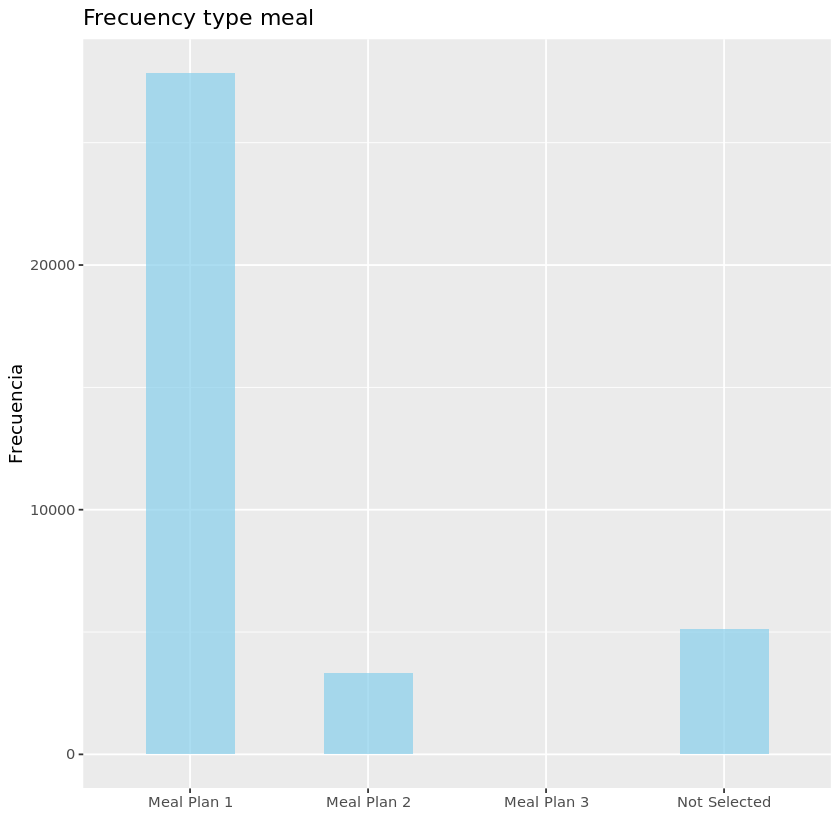

In [74]:
gcomida <- ggplot(data, aes(type_of_meal_plan)) +
    geom_bar(width = 0.5, alpha = 0.7,
                 aes(y = (..count..)), position='stack', fill='sky blue') +
    labs(x='', y='Frecuencia', title = 'Frecuency type meal')

plot(gcomida)

## About family

In [75]:
mean(data$avg_price_per_room[which(data$no_of_children > 0 & data$no_of_adults > 0)])
mean(data$avg_price_per_room[which(data$no_of_children == 0 & data$no_of_adults > 0)])

[1] 144.2943

[1] 100.3992

In [76]:
length(which(data$no_of_children > 0 & data$no_of_adults > 0))
length(which(data$no_of_children == 0 & data$no_of_adults > 0))
length(which(data$no_of_children > 0 & data$no_of_adults == 0))


[1] 2559

[1] 33577

[1] 139

## About lead time

In [77]:
length(which(data$lead_time > 14))
length(which(data$lead_time <= 14))


[1] 27890

[1] 8385

In [78]:
mean(data$avg_price_per_room[which(data$lead_time > 14)])
mean(data$avg_price_per_room[which(data$lead_time <= 14)])

[1] 103.9289

[1] 101.7426

# Family

Now let's see proportions between adults and children.

In [46]:
length(which(data$no_of_children > 0 | data$no_of_adults > 0)) == nrow(data)

[1] TRUE

This was a brief check that there aren't bookings without customers.

In [47]:
sum(data$no_of_adults)/(sum(data$no_of_adults)+sum(data$no_of_children))
length(which(data$no_of_adults > 0))/length(data$no_of_children > 0 | data$no_of_adults > 0)

[1] 0.9460174

[1] 0.9961682

So, 94.6% of the people included in the reservations are adults, and 99.6% of the bookings include at least one adult. How often do they book hotel rooms with children? 

In [48]:
length(which(data$no_of_children > 0 & data$no_of_adults > 0))/length(which(data$no_of_adults > 0))

[1] 0.07081581

Therefore, looks like people doesn't want to go hotels with children. Are there any reservations without adults?

In [49]:
cat('There are', length(which(data$no_of_children > 0))-length(which(data$no_of_children > 0 & data$no_of_adults > 0)),
'reservations with only children.')

There are 139 reservations with only children.

In [50]:
length(which(data$no_of_week_nights > 0 & data$no_of_children > 0 & data$no_of_weekend_nights == 0))/length(which(data$no_of_children > 0))
length(which(data$no_of_week_nights == 0 & data$no_of_children > 0 & data$no_of_weekend_nights > 0))/length(which(data$no_of_children > 0))
length(which(data$no_of_week_nights > 0 & data$no_of_children > 0 & data$no_of_weekend_nights > 0))/length(which(data$no_of_children > 0))

[1] 0.4225352

[1] 0.05374351

[1] 0.5218681

In [51]:
length(which(data$no_of_week_nights > 0 & data$no_of_adults > 0 & data$no_of_weekend_nights == 0))/length(which(data$no_of_adults > 0))
length(which(data$no_of_week_nights == 0 & data$no_of_adults > 0 & data$no_of_weekend_nights > 0))/length(which(data$no_of_adults > 0))
length(which(data$no_of_week_nights > 0 & data$no_of_adults > 0 & data$no_of_weekend_nights > 0))/length(which(data$no_of_adults > 0))

[1] 0.4630839

[1] 0.06378681

[1] 0.4709708

In [52]:
length(which(data$required_car_parking_space == 0 & data$no_of_children == 0))/length(which(data$no_of_children == 0))
length(which(data$required_car_parking_space == 1 & data$no_of_children == 0))/length(which(data$no_of_children == 0))
length(which(data$required_car_parking_space == 0 & data$no_of_children > 0))/length(which(data$no_of_children > 0))
length(which(data$required_car_parking_space == 1 & data$no_of_children > 0))/length(which(data$no_of_children > 0))

[1] 0.9706049

[1] 0.02939512

[1] 0.9492216

[1] 0.05077835

In [53]:
length(which(data$no_of_special_requests == 0 & data$no_of_children == 0))/length(which(data$no_of_children == 0))
length(which(data$no_of_special_requests > 0 & data$no_of_children == 0))/length(which(data$no_of_children == 0))
length(which(data$no_of_special_requests == 0 & data$no_of_children > 0))/length(which(data$no_of_children > 0))
length(which(data$no_of_special_requests > 0 & data$no_of_children > 0))/length(which(data$no_of_children > 0))


[1] 0.5608303

[1] 0.4391697

[1] 0.3506301

[1] 0.6493699

## Days per week

Proportion of days reserved week-weekend:

In [54]:
length(which(data$no_of_weekend_nights > 0 | data$no_of_week_nights > 0)) == nrow(data)

[1] FALSE

In [55]:
cat("Then we have", nrow(data)-length(which(data$no_of_weekend_nights > 0 | data$no_of_week_nights > 0)), "reservations of 0 nights." )

Then we have 78 reservations of 0 nights.

In [56]:
#we is weekend 
#w is week

prop_we_nights = sum(data$no_of_weekend_nights)/(sum(data$no_of_week_nights)+sum(data$no_of_weekend_nights))
w_not_we = length(which(data$no_of_weekend_nights == 0 & data$no_of_week_nights > 0))
we_not_w = length(which(data$no_of_weekend_nights > 0 & data$no_of_week_nights == 0))
w_and_we = length(which(data$no_of_weekend_nights > 0 & data$no_of_week_nights > 0))

cat(prop_we_nights*100, '% of the nights reserved are on weekend.\n')
cat(100*w_not_we/nrow(data), '% of the reservations only include week nights.\n')
cat(100*we_not_w/nrow(data), '% of the reservations only include weekend nights.\n')
cat(100*w_and_we/nrow(data), '% of the reservations include week and weekend nights.\n')
cat('The sum of these three percentages is not equal to one because of those 78 strange reservations without nights.')

26.88946 % of the nights reserved are on weekend.
46.29635 % of the reservations only include week nights.
6.365265 % of the reservations only include weekend nights.
47.12336 % of the reservations include week and weekend nights.
The sum of these three percentages is not equal to one because of those 78 strange reservations without nights.

# Cancelaciones.

In [57]:
cancelados = which(data$booking_status == 'Canceled')
length(cancelados)+length(which(data$booking_status == 'Not_Canceled')) == nrow(data)

[1] TRUE

In [58]:
cat(100*length(cancelados)/nrow(data), '% of the reservation are canceled.')

32.76361 % of the reservation are canceled.

In [59]:
#ratio cancelados y precedentes de cancelar/cancelados

length(which(data$no_of_previous_cancellations >0 & data$booking_status == 'Canceled'))/length(cancelados)

[1] 0.001346235

In [60]:
data[which(data$no_of_previous_cancellations >0 & data$booking_status == 'Canceled'),]

Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
INN02383,1,0,0,1,Meal Plan 1,0,Room_Type 1,361,2018,11,4,Online,1,1,0,91.00,0,Canceled
INN02627,2,0,1,5,Meal Plan 1,0,Room_Type 1,104,2018,2,29,Online,1,1,0,61.43,0,Canceled
INN04672,1,0,1,0,Meal Plan 1,0,Room_Type 1,45,2018,4,10,Corporate,1,1,6,65.00,0,Canceled
INN11930,1,0,0,1,Meal Plan 1,0,Room_Type 1,34,2018,7,19,Corporate,1,3,12,65.00,0,Canceled
INN12098,2,0,1,1,Meal Plan 1,0,Room_Type 1,190,2018,4,9,Offline,1,13,1,70.00,0,Canceled
INN12110,2,0,1,1,Meal Plan 1,0,Room_Type 1,190,2018,4,9,Offline,1,13,1,70.00,0,Canceled
INN15160,1,0,0,1,Meal Plan 1,0,Room_Type 1,361,2018,11,4,Online,1,1,0,91.00,0,Canceled
INN16278,2,0,1,1,Meal Plan 1,0,Room_Type 1,190,2018,4,9,Offline,1,13,1,70.00,0,Canceled
INN19053,1,0,0,1,Meal Plan 1,0,Room_Type 1,361,2018,11,4,Online,1,1,0,91.00,0,Canceled


In [61]:
#ratio no cancelados y precedentes de no cancelar/no cancelados

length(which(data[-cancelados,]$no_of_previous_bookings_not_canceled > 0))/(nrow(data)-length(cancelados))

[1] 0.03300533

In [62]:
haidoantesaunhotel = which(data$no_of_previous_bookings_not_canceled > 0 | data$no_of_previous_cancellations > 0)
#los que tienen reservas previas en sus historiales (canceladas o no canceladas)

difprevias = - data[haidoantesaunhotel,]$no_of_previous_cancellations + data[haidoantesaunhotel,]$no_of_previous_bookings_not_canceled
#diferencia de vectores de no cancelaciones previas - cancelaciones previas
#los negativos son mas cancelaciones previas que no cancelaciones previas

length(which(difprevias < 0))/length(difprevias)
length(which(difprevias > 0))/length(difprevias)
length(which(difprevias == 0))/length(difprevias)
#proporciones 

[1] 0.1526882

[1] 0.8344086

[1] 0.01290323

In [63]:
#head(data[haidoantesaunhotel,])
#head(data[-haidoantesaunhotel,])

#proporcion haidoantesaunhotel

length(haidoantesaunhotel)/nrow(data)


#proporcion cancelaciones de gente que ha ido antes a un hotel (==repeated guests)

length(which(data[haidoantesaunhotel,]$booking_status == 'Canceled'))/length(haidoantesaunhotel)


#proporcion cancelaciones de gente que no ha ido antes a un hotel

length(which(data[-haidoantesaunhotel,]$booking_status == 'Canceled'))/(nrow(data)-length(haidoantesaunhotel))


#proporcion de repetidos

length(which(data$repeated_guest == 1 & data$booking_status == 'Canceled'))/length(which(data$repeated_guest == 1))


Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
INN00089,2,0,0,1,Not Selected,0,Room_Type 1,17,2018,12,10,Online,1,0,5,95,0,Not_Canceled
INN00146,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0,1,Not_Canceled
INN00156,1,0,0,3,Meal Plan 1,0,Room_Type 1,4,2018,11,1,Corporate,1,1,5,65,1,Not_Canceled
INN00267,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0,1,Not_Canceled
INN00289,2,0,0,1,Meal Plan 1,0,Room_Type 2,9,2018,9,7,Complementary,1,0,3,0,1,Not_Canceled
INN00303,2,0,2,1,Meal Plan 1,0,Room_Type 1,68,2018,1,2,Offline,1,1,0,63,1,Not_Canceled


Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled


[1] 0.02563749

[1] 0.0172043

[1] 0.3358042

[1] 0.0172043

In [64]:
#PROPORCION DE GENTE QUE TIENE MENOS CANCELACIONES PREVIAS QUE NO CANCELACIONES CON RESERVA ACTUAL CANCELADA

length(which(data$no_of_previous_bookings_not_canceled>data$no_of_previous_cancellations & data$booking_status == 'Canceled'))/length(which(data$no_of_previous_bookings_not_canceled>data$no_of_previous_cancellations))

#PROPORCION DE GENTE QUE TIENE MAS CANCELACIONES PREVIAS QUE NO CANCELACIONES CON RESERVA ACTUAL CANCELADA

length(which(data$no_of_previous_bookings_not_canceled<data$no_of_previous_cancellations & data$booking_status == 'Canceled'))/length(which(data$no_of_previous_bookings_not_canceled<data$no_of_previous_cancellations))

#PROPORCION DE GENTE QUE TIENE MISMAS CANCELACIONES PREVIAS QUE NO CANCELACIONES CON RESERVA ACTUAL CANCELADA

length(which(data$no_of_previous_bookings_not_canceled==data$no_of_previous_cancellations & data$no_of_previous_bookings_not_canceled > 0 & data$no_of_previous_cancellations > 0 & data$booking_status == 'Canceled'))/length(which(data$no_of_previous_bookings_not_canceled==data$no_of_previous_cancellations & data$no_of_previous_bookings_not_canceled > 0 & data$no_of_previous_cancellations > 0))


[1] 0.003865979

[1] 0.0915493

[1] 0

## About prices

In [65]:
summary(data$avg_price_per_room)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   80.30   99.45  103.42  120.00  540.00 

In [66]:
length(which(data$avg_price_per_room<81 & data$booking_status == 'Canceled'))/length(which(data$avg_price_per_room < 81))

length(which(data$avg_price_per_room>120 & data$booking_status == 'Canceled'))/length(which(data$avg_price_per_room >120))

length(which(data$avg_price_per_room>=81 & data$avg_price_per_room<=120  & data$booking_status == 'Canceled'))/length(which(data$avg_price_per_room>=81 & data$avg_price_per_room<=120))


[1] 0.214971

[1] 0.3735924

[1] 0.3644259

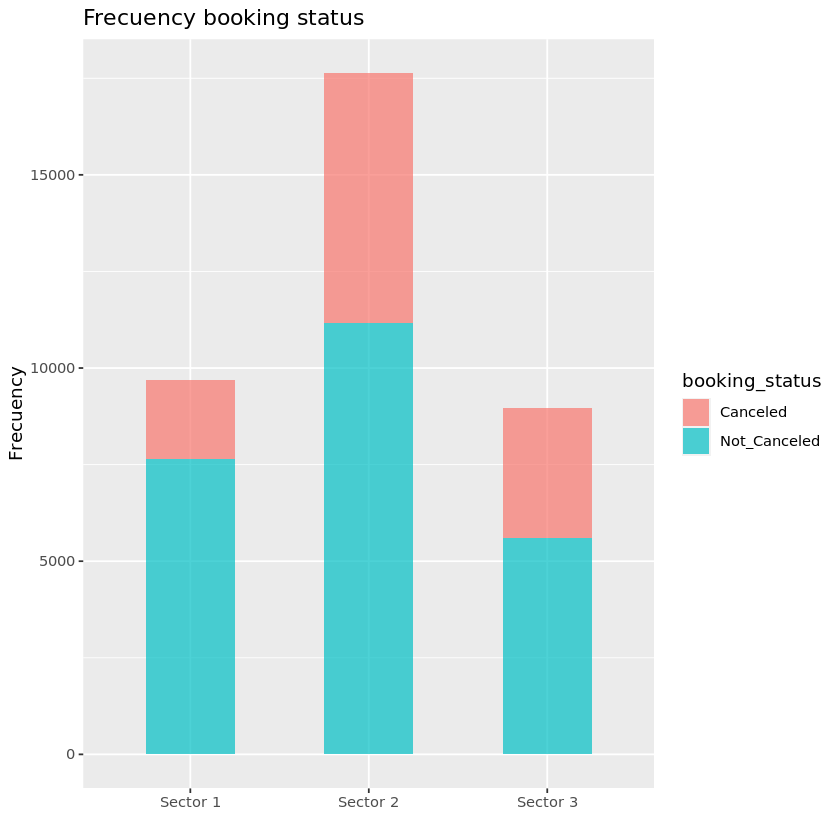

In [67]:
gsector <- ggplot(newdata, aes(sector, fill = booking_status)) +
    geom_bar(width = 0.5, alpha = 0.7,
                 aes(y = (..count..)), position='stack') +
    labs(x='', y='Frecuency', title = 'Frecuency booking status')

plot(gsector)

## About market segment type

In [5]:
unique(data$market_segment_type)
length(which(data$market_segment_type == 'Corporate'))
length(which(data$market_segment_type == 'Offline'))
length(which(data$market_segment_type == 'Online'))
length(which(data$market_segment_type == 'Aviation'))
length(which(data$market_segment_type == 'Complementary'))

[1] "Offline"       "Online"        "Corporate"     "Aviation"     
[5] "Complementary"

[1] 2017

[1] 10528

[1] 23214

[1] 125

[1] 391

[1] 545

We are left with offline, online and corporate.

In [13]:
length(which(data$market_segment_type == 'Online' & data$booking_status == 'Canceled'))/length(which(data$market_segment_type == 'Online'))
length(which(data$market_segment_type == 'Offline' & data$booking_status == 'Canceled'))/length(which(data$market_segment_type == 'Offline'))
length(which(data$market_segment_type == 'Corporate' & data$booking_status == 'Canceled'))/length(which(data$market_segment_type == 'Corporate'))

[1] 0.3650814

[1] 0.2994871

[1] 0.1090729

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ca563382-6f70-4aa4-99f1-efca4704b6b0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>